In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-03-26 18:02:25.213998: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 18:02:25.214050: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 18:02:25.272822: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-26 18:02:25.389413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 18:02:26.266595: W tensorflow/compiler/tf2

In [3]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

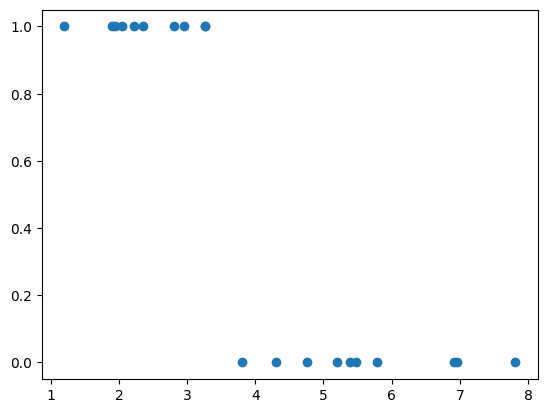

In [4]:
plt.scatter(xs, labels)

In [5]:
# replace classification model with "keras"

learning_rate = 0.001
training_epochs = 1000

X = tf.keras.Input(shape = (), dtype=float)
Y = tf.keras.Input(shape = (), dtype=float)

In [6]:
def model_b(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))

In [7]:
w = tf.Variable([0., 0.], name="parameters")
y_model = model_b(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))


<KerasTensor: shape=() dtype=float32 (created by layer 'tf.math.reduce_sum')>

In [8]:
# replace gradient descent with keras optimizer SGD

train_op = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [14]:
## Sessions don't work in Tensorflow 2, could not figure out how to replace this.

In [16]:
# replace tf.to_float() with tf.cast(..., tf.float32)
correct_prediction = tf.equal(Y, tf.cast(tf.greater(y_model, 0.5), tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Cannot use sessionsm sess.run() doesn't exist in TF2
# train_op.fit(X, Y)